In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Legend**

* Broad =	Relevant, but will probably yield general results. 
* Specific = Relevant, but will generate results for a very specifc case
	
**Note**: This batch of queries is not representative of a perfect set. The ratio of broad to specific prompt topics is due to randomized prompt generation. 	

In [2]:
query= pd.read_csv("PSP.csv")
query.head()

,Prompt,Relevance,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Vessel caught misreporting catch amount,Broad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vessel caught falsifying fishing logs,Broad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vessel caught with incorrect catch reports,Broad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vessel caught underreporting catch in North At...,Broad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vessel caught misreporting haddock catch,Specific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#query.columns

In [3]:
query_drop= query.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11'], axis=1)
query_drop

,Prompt,Relevance
0,Vessel caught misreporting catch amount,Broad
1,Vessel caught falsifying fishing logs,Broad
2,Vessel caught with incorrect catch reports,Broad
3,Vessel caught underreporting catch in North At...,Broad
4,Vessel caught misreporting haddock catch,Specific
...,...,...
95,Vessel caught underreporting catch for insuran...,Broad
96,Vessel caught with mislabeled fish species,Broad
97,Vessel caught falsifying catch during transport,Broad
98,Vessel caught misreporting catch for fishing c...,Broad


In [4]:
qb= query_drop[query_drop["Relevance"]== "Broad" ]
qb

,Prompt,Relevance
0,Vessel caught misreporting catch amount,Broad
1,Vessel caught falsifying fishing logs,Broad
2,Vessel caught with incorrect catch reports,Broad
3,Vessel caught underreporting catch in North At...,Broad
5,Vessel caught with inaccurate fish size records,Broad
...,...,...
95,Vessel caught underreporting catch for insuran...,Broad
96,Vessel caught with mislabeled fish species,Broad
97,Vessel caught falsifying catch during transport,Broad
98,Vessel caught misreporting catch for fishing c...,Broad


In [ ]:
#qb["Prompt"]

In [5]:
qs= query_drop[query_drop["Relevance"]== "Specific" ]
qs

,Prompt,Relevance
4,Vessel caught misreporting haddock catch,Specific
7,Vessel caught misreporting tuna catch quantities,Specific
15,Vessel caught underreporting salmon catch,Specific
17,Vessel caught misreporting bluefin tuna catch,Specific
26,Vessel caught underreporting sardine catch,Specific
35,Vessel caught misreporting hake catch,Specific
82,Vessel caught misreporting cod catch volumes,Specific
87,Vessel caught underreporting shrimp catch,Specific


In [ ]:
#qs["Prompt"]

In [86]:
# Enumerate rows using iterrows()
#for index, row in enumerate(qs.iterrows(), start=1):
   #print(f"Row {index}: {row[1].to_dict()}")

In [9]:
len(qs)

8

In [ ]:
#for index, row in enumerate(qs.iterrows(), start=1):
    #print(f"{row[1].to_dict()}")

In [ ]:
#one= row[1].to_dict()
#one.keys(), 
#one.values(), 
#one["Prompt"]

In [87]:
#for index, row in enumerate(qs.iterrows(), start=1):
    #j_1= row[1]["Prompt"]
    #j_2= row[1]["Relevance"]
    #print(f"{(j_1, j_2 )}")

In [10]:
qs["Prompt"]

4             Vessel caught misreporting haddock catch
7     Vessel caught misreporting tuna catch quantities
15           Vessel caught underreporting salmon catch
17       Vessel caught misreporting bluefin tuna catch
26          Vessel caught underreporting sardine catch
35               Vessel caught misreporting hake catch
82        Vessel caught misreporting cod catch volumes
87           Vessel caught underreporting shrimp catch
Name: Prompt, dtype: object

In [88]:
# first function:
#def print_prompt_relevance_pairs(qs):
    #"""
    #Function to iterate through qs rows and print pairs of 'Prompt' and 'Relevance' fields.
    #Parameters:
    #df (pandas.DataFrame): The input DataFrame containing 'Prompt' and 'Relevance' columns.
    #"""
    #for index, row in enumerate(qs.iterrows(), start=1):
        #j_1 = row[1]["Prompt"]
        #j_2 = row[1]["Relevance"]
        #print(f"{(j_1, j_2)}")
        
#print_prompt_relevance_pairs(qs)      

In [11]:
qs["Prompt"].iloc[0]

'Vessel caught misreporting haddock catch'

**For qs:**

In [6]:
word1 = 'misreporting'
word2 = 'Specific'
def check_words_in_rows(qs):
    t=0
    while t< len(qs):
            
            j_1 = qs["Prompt"].iloc[t]
            j_2 = qs["Relevance"].iloc[t]
            t=t+1
            #print(j_1,'|',j_2)
            
            if (word1 in j_1) and (word2 in j_2):
                print("WoW! ")
                    #continue
            else:
            
                print("Oops! ")
           
                
            

In [13]:
print(check_words_in_rows(qs))

WoW! 
WoW! 
Oops! 
WoW! 
Oops! 
WoW! 
WoW! 
Oops! 
None


**For qb:**

In [7]:
word1 = 'underreporting'
word2 = 'Broad'
def check_words_in_rows(qb):
    t=0
    count1 = [0]  
    count2 = [0] 
    while t< len(qb):
            
            j_1 = qb["Prompt"].iloc[t]
            j_2 = qb["Relevance"].iloc[t]
            t+=1
            #print(j_1,'|',j_2)
            
            if (word1 in j_1) and (word2 in j_2):
                count1.append(1)
                
            else:
                count2.append(1)

            
    print("Count1:", count1)
    print("Count2:", count2)           
                     

In [15]:
print(check_words_in_rows(qb))

Count1: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Count2: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
None


In [8]:
count1= [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sum = sum(count1)
print(Sum)

18


In [9]:
count2= [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Sum = sum(count2)
print(Sum)

74


**For: query_drop**

In [10]:

word1 = 'Specific'
Word2 = 'Broad'
word3 = 'misreporting'
word4 = 'underreporting'

def check_words_in_rows(query_drop):
    t=0
    count1 = [0]  
    count2 = [0] 
    count3 = [0]  
    count4 = [0]
    while t< len(query_drop):
            
            j_1 = query_drop["Prompt"].iloc[t]
            j_2 = query_drop["Relevance"].iloc[t]
            t+=1
            #print(j_1,'|',j_2)
            
            if (word1 in j_1) and (word2 in j_2):
                count1.append(1)
                
            if (word1 in j_1) and (word4 in j_2):
                count2.append(1)
                
            if (word3 in j_1) and (word2 in j_2):
                count3.append(1)
                
            if (word3 in j_1) and (word4 in j_2):
                count4.append(1)

            
    print("The number of pair (Underreporting, Broad):", count1)
    print("The number of pair (Underreporting, Specific):", count2) 
    print("The number of pair (misreporting, Broad):", count3)
    print("The number of pair (misreporting, Specific):", count4)


In [11]:
print(check_words_in_rows(query_drop))

The number of pair (Underreporting, Broad): [0]
The number of pair (Underreporting, Specific): [0]
The number of pair (misreporting, Broad): [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The number of pair (misreporting, Specific): [0]
None


**Finding the key words that did not mention in the previous code** 

In [361]:
word5 = 'falsifying'
word6 = 'incorrec'
word7 = 'mislabeled'
word8 = 'undisclosed'
word9 = 'altered'
word10 = 'hidden'
word11 = 'false'
word12 = 'non-disclosed'
word13 = 'non-compliant'
word14 = 'undeclared'
word15 = 'fake'
word16 = 'unreported'
word17 = 'inaccurate'
word18 = 'unrecorded'
word19 = 'bypassing'
word20 = 'illegal'
word21 = 'banned'
word22 = 'manipulated'
word23 = 'exceeding'
word24 = 'unregistered'
word25 = 'underreported'
word26 = 'falsified'
word27 = 'evading'
word28 = 'hiding'
word29 = 'doctored'
word30 = 'contraband'

In [213]:
# List of words
relevance_words = ['Specific', 'Broad']
prompt_words = [
    'misreporting', 'underreporting', 'falsifying', 'incorrec', 'mislabeled', 'undisclosed', 
    'altered', 'hidden', 'false', 'non-disclosed', 'non-compliant', 'undeclared', 'fake', 
    'unreported', 'inaccurate', 'unrecorded', 'bypassing', 'illegal', 'banned', 
    'manipulated', 'exceeding', 'unregistered', 'underreported', 'falsified', 'evading', 
    'hiding', 'doctored', 'contraband', 'mislabeled'
]

def check_words_in_rows(query_drop):
    # Initialize a dictionary to count occurrences of each pair
    pair_counts = {f"({p}, {r})": 0 for p in prompt_words for r in relevance_words}

    # Iterate over each row in the DataFrame(query_drop)
    for t in range(len(query_drop)):
        j_1 = query_drop["Prompt"].iloc[t]
        j_2 = query_drop["Relevance"].iloc[t]

        # Check each pair of words 
        # here we check all possibility of pairs, so for each element of prompt_words we have 2 options, means that we have 60 options over all.
        for p_word in prompt_words:
            for r_word in relevance_words:
                if p_word in j_1 and r_word in j_2:
                    pair_counts[f"({p_word}, {r_word})"] += 1

    # Print the counts for each pair
    for pair, count in pair_counts.items():
        print(f"The number of pair {pair}: {count}")


check_words_in_rows(query_drop)

The number of pair (misreporting, Specific): 5
The number of pair (misreporting, Broad): 21
The number of pair (underreporting, Specific): 3
The number of pair (underreporting, Broad): 18
The number of pair (falsifying, Specific): 0
The number of pair (falsifying, Broad): 17
The number of pair (incorrec, Specific): 0
The number of pair (incorrec, Broad): 4
The number of pair (mislabeled, Specific): 0
The number of pair (mislabeled, Broad): 2
The number of pair (undisclosed, Specific): 0
The number of pair (undisclosed, Broad): 2
The number of pair (altered, Specific): 0
The number of pair (altered, Broad): 1
The number of pair (hidden, Specific): 0
The number of pair (hidden, Broad): 2
The number of pair (false, Specific): 0
The number of pair (false, Broad): 2
The number of pair (non-disclosed, Specific): 0
The number of pair (non-disclosed, Broad): 1
The number of pair (non-compliant, Specific): 0
The number of pair (non-compliant, Broad): 1
The number of pair (undeclared, Specific):

In [337]:
#new_dict= dict(pair_counts.items())
#new_dict

### Plot of excel queries

The number of pair (misreporting, Specific): 5
The number of pair (misreporting, Broad): 21
The number of pair (underreporting, Specific): 3
The number of pair (underreporting, Broad): 18
The number of pair (falsifying, Specific): 0
The number of pair (falsifying, Broad): 17
The number of pair (incorrec, Specific): 0
The number of pair (incorrec, Broad): 4
The number of pair (mislabeled, Specific): 0
The number of pair (mislabeled, Broad): 2
The number of pair (undisclosed, Specific): 0
The number of pair (undisclosed, Broad): 2
The number of pair (altered, Specific): 0
The number of pair (altered, Broad): 2
The number of pair (hidden, Specific): 0
The number of pair (hidden, Broad): 2
The number of pair (false, Specific): 0
The number of pair (false, Broad): 2
The number of pair (non-disclosed, Specific): 0
The number of pair (non-disclosed, Broad): 1
The number of pair (non-compliant, Specific): 0
The number of pair (non-compliant, Broad): 1
The number of pair (undeclared, Specific):

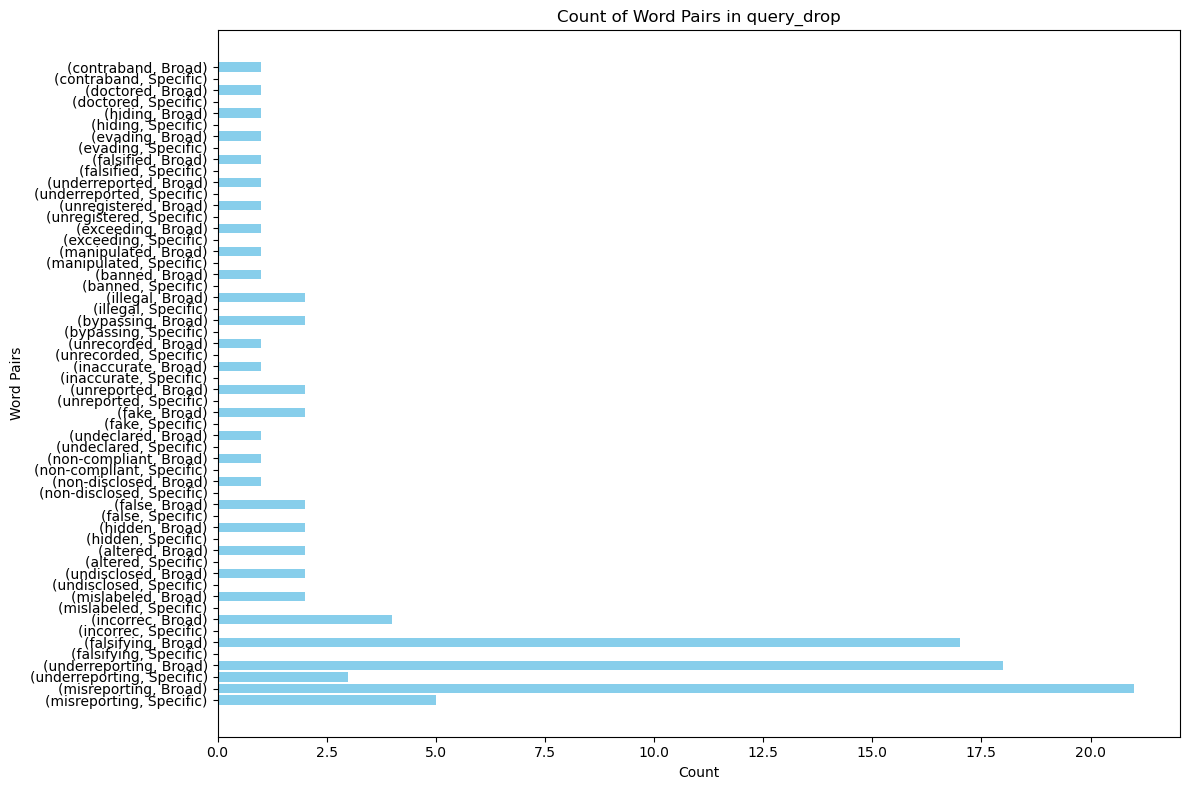

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

# List of words
relevance_words = ['Specific', 'Broad']
prompt_words = [
    'misreporting', 'underreporting', 'falsifying', 'incorrec', 'mislabeled', 'undisclosed', 
    'altered', 'hidden', 'false', 'non-disclosed', 'non-compliant', 'undeclared', 'fake', 
    'unreported', 'inaccurate', 'unrecorded', 'bypassing', 'illegal', 'banned', 
    'manipulated', 'exceeding', 'unregistered', 'underreported', 'falsified', 'evading', 
    'hiding', 'doctored', 'contraband', 'altered', 'mislabeled'
]

def check_words_in_rows(query_drop):
    # Initialize a dictionary to count occurrences of each pair
    pair_counts = {f"({p}, {r})": 0 for p in prompt_words for r in relevance_words}

    # Iterate over each row in the DataFrame(query_drop)
    for t in range(len(query_drop)):
        j_1 = query_drop["Prompt"].iloc[t]
        j_2 = query_drop["Relevance"].iloc[t]

        # Check each pair of words
        for p_word in prompt_words:
            for r_word in relevance_words:
                if p_word in j_1 and r_word in j_2:
                    pair_counts[f"({p_word}, {r_word})"] += 1

    # Print the counts for each pair
    for pair, count in pair_counts.items():
        print(f"The number of pair {pair}: {count}")

    # Plotting
    pairs = list(pair_counts.keys())
    counts = list(pair_counts.values())

    plt.figure(figsize=(12, 8))
    plt.barh(pairs, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Word Pairs')
    plt.title('Count of Word Pairs in query_drop')
    plt.tight_layout()
    plt.show()


check_words_in_rows(query_drop)


In [14]:
# Example DataFrame
data = {
    'Prompt': [
        'Vessel caught underreporting haddock catch',
        'Another event of falsifying records',
        'Mislabeled products found in the market',
        'Hiding illegal substances in shipments',
        'Broad issue with non-disclosed activities'
    ],
    'Relevance': ['Broad', 'Specific', 'General', 'Broad', 'Specific']
}

PR = pd.DataFrame(data)
PR

,Prompt,Relevance
0,Vessel caught underreporting haddock catch,Broad
1,Another event of falsifying records,Specific
2,Mislabeled products found in the market,General
3,Hiding illegal substances in shipments,Broad
4,Broad issue with non-disclosed activities,Specific


In [36]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 559.0 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 3.1 MB/s eta 0:00:0000:0100:01
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 6.8 MB/s eta 0:00:00


In [15]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hivagheisari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hivagheisari/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<< Merriam-Webster Thesaurus API >> has better packages!

**I wanna find synonyms and collocations that may be used instead of our keyword + the other form of the keywords like the past tense or adj, adv form of the keywords.**

prompt_words = ['misreporting', 'underreporting', 'falsifying', 'incorrec', 'mislabeled', 'undisclosed', 
    'altered', 'hidden', 'false', 'non-disclosed', 'non-compliant', 'undeclared', 'fake', 
    'unreported', 'inaccurate', 'unrecorded', 'bypassing', 'illegal', 'banned', 
    'manipulated', 'exceeding', 'unregistered', 'underreported', 'falsified', 'evading', 
    'hiding', 'doctored', 'contraband', 'altered', 'mislabeled'
]

### In Progress...

In [215]:
from nltk.corpus import wordnet

# Get synonyms for a word
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms

word = "misreporting"
synonyms = get_synonyms(word)
print(synonyms)

set()


****************************************
**********************
**************

**This function retrieves the synonyms of the given query word:** 

In [122]:
import requests

def get_synonyms(word):
    url = f"https://api.datamuse.com/words?rel_syn={word}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        synonyms = [entry['word'] for entry in data]
        return synonyms
    else:
        print("Error:", response.status_code)
        return []

word = "report"
synonyms = get_synonyms(word)
print("Synonyms for", word + ":", synonyms)
len(synonyms)

Synonyms for report: ['account', 'paper', 'cover', 'study', 'story', 'composition', 'describe', 'theme', 'reputation', 'turn in', 'write up', 'report card', 'news report']


13

**This function retrieves words with meanings similar to the given query word:** 

In [79]:
import requests

def get_related_words(word):
    url = f"https://api.datamuse.com/words?ml={word}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [entry['word'] for entry in data]
        return related_words
    else:
        print("Error:", response.status_code)
        return []

In [127]:
word = "false"
related_words = get_related_words(word)
print("Words related to", word + ":", related_words)
len(related_words)

Words related to false: ['mendacious', 'untrue', 'insincere', 'wrong', 'dishonorable', 'specious', 'faux', 'treasonably', 'sham', 'faithlessly', 'incorrect', 'off-key', 'fake', 'traitorously', 'inharmonious', 'trumped-up', 'inconstant', 'treacherously', 'mistaken', 'artificial', 'invalid', 'unharmonious', 'assumed', 'pretended', 'unreal', 'counterfeit', 'simulated', 'delusive', 'dishonest', 'fictitious', 'imitative', 'imitation', 'fictive', 'unrealistic', 'sour', 'hollow', 'put on', 'bogus', 'erroneous', 'falsey', 'true', 'fraudulent', 'falsehood', 'spurious', 'misleading', 'falsity', 'fals', 'deceptive', 'falsified', 'baseless', 'phony', 'untruthful', 'inaccurate', 'unsubstantiated', 'misrepresentative', 'illusory', 'unverifiable', 'misrepresentation', 'delusory', 'fallacious', 'falsehoods', 'exaggerations', 'unfounded', 'perjurious', 'pretenses', 'illusionary', 'exaggerated', 'falsities', 'falso', 'deceitful', 'unsupportable', 'misrepresentations', 'dubious', 'factitious', 'falsify',

100

In [128]:
import requests

def get_related_words(word, limit=50):
    url = f"https://api.datamuse.com/words?ml={word}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [entry['word'] for entry in data[:limit]]
        return related_words
    else:
        print("Error:", response.status_code)
        return []

In [129]:
word = "false"
related_words = get_related_words(word)
print("Words related to", word + ":", related_words)
len(related_words)

Words related to false: ['mendacious', 'untrue', 'insincere', 'wrong', 'dishonorable', 'specious', 'faux', 'treasonably', 'sham', 'faithlessly', 'incorrect', 'off-key', 'fake', 'traitorously', 'inharmonious', 'trumped-up', 'inconstant', 'treacherously', 'mistaken', 'artificial', 'invalid', 'unharmonious', 'assumed', 'pretended', 'unreal', 'counterfeit', 'simulated', 'delusive', 'dishonest', 'fictitious', 'imitative', 'imitation', 'fictive', 'unrealistic', 'sour', 'hollow', 'put on', 'bogus', 'erroneous', 'falsey', 'true', 'fraudulent', 'falsehood', 'spurious', 'misleading', 'falsity', 'fals', 'deceptive', 'falsified', 'baseless']


50

In [130]:
import requests

def get_related_words(word, limit=50, topics=None):
    # Construct the URL with additional parameters for optimization
    url = f"https://api.datamuse.com/words?ml={word}&max={limit}"
    
    if topics:
        url += f"&topics={topics}"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [entry['word'] for entry in data]
        return related_words
    else:
        print("Error:", response.status_code)
        return []

def check_word_in_list(word, word_list):
    if word in word_list:
        return f"'{word}' is in the list."
    else:
        return f"'{word}' is not in the list."


In [220]:
word = "false"
related_words = get_related_words(word, topics="education,teaching")
print(related_words)

[('imitation', []), ('imitative', []), ('falsehood', []), ('falsity', []), ('dishonest', []), ('mendacious', []), ('unreal', []), ('sham', []), ('delusive', []), ('assumed', []), ('insincere', []), ('pretended', []), ('fraudulent', []), ('artificial', []), ('untrue', []), ('wrong', []), ('hollow', []), ('put on', []), ('counterfeit', []), ('bogus', []), ('dishonorable', []), ('simulated', []), ('faux', []), ('erroneous', []), ('deceptive', []), ('specious', []), ('baseless', []), ('misleading', []), ('unrealistic', []), ('true', []), ('falsified', []), ('fictive', []), ('spurious', []), ('invalid', []), ('fictitious', []), ('mistaken', []), ('sour', []), ('fake', []), ('incorrect', []), ('inconstant', []), ('treacherously', []), ('treasonably', []), ('faithlessly', []), ('off-key', []), ('traitorously', []), ('inharmonious', []), ('trumped-up', []), ('unharmonious', []), ('falsey', []), ('fals', [])]


In [222]:
related_words = get_related_words(word, topics="education,teaching")
word_to_check = "falsify"
print(check_word_in_list(word_to_check, related_words))

'falsify' is not in the list.


In [136]:
import requests

def get_related_words(word, limit=100, topics=None):
    url = f"https://api.datamuse.com/words?ml={word}&max={limit}"
    
    if topics:
        url += f"&topics={topics}"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [entry['word'] for entry in data]
        return related_words
    else:
        print("Error:", response.status_code)
        return []

def check_word_in_list(word, word_list):
    if word in word_list:
        return f"'{word}' is in the list."
    else:
        return f"'{word}' is not in the list."

In [223]:
word = "false"
related_words = get_related_words(word, topics="education,learning")
word_to_check = "falsifying"

print(check_word_in_list(word_to_check, related_words))

'falsifying' is not in the list.


In [138]:
import requests

def get_related_words(word, limit=50, topics=None):
    url = f"https://api.datamuse.com/words?ml={word}&max={limit}&md=f"  # Adding 'md=f' to get word forms
    
    if topics:
        url += f"&topics={topics}"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [(entry['word'], entry.get('forms', [])) for entry in data]  # Including word forms
        return related_words
    else:
        print("Error:", response.status_code)
        return []

In [139]:
# Example usage
word = "false"
related_words = get_related_words(word)
for word, forms in related_words:
    print(f"Word: {word}, Forms: {forms}")

Word: mendacious, Forms: []
Word: untrue, Forms: []
Word: insincere, Forms: []
Word: wrong, Forms: []
Word: dishonorable, Forms: []
Word: specious, Forms: []
Word: faux, Forms: []
Word: treasonably, Forms: []
Word: sham, Forms: []
Word: faithlessly, Forms: []
Word: incorrect, Forms: []
Word: off-key, Forms: []
Word: fake, Forms: []
Word: traitorously, Forms: []
Word: inharmonious, Forms: []
Word: trumped-up, Forms: []
Word: inconstant, Forms: []
Word: treacherously, Forms: []
Word: mistaken, Forms: []
Word: artificial, Forms: []
Word: invalid, Forms: []
Word: unharmonious, Forms: []
Word: assumed, Forms: []
Word: pretended, Forms: []
Word: unreal, Forms: []
Word: counterfeit, Forms: []
Word: simulated, Forms: []
Word: delusive, Forms: []
Word: dishonest, Forms: []
Word: fictitious, Forms: []
Word: imitative, Forms: []
Word: imitation, Forms: []
Word: fictive, Forms: []
Word: unrealistic, Forms: []
Word: sour, Forms: []
Word: hollow, Forms: []
Word: put on, Forms: []
Word: bogus, Forms:

In [140]:
import requests

def get_related_word_forms(word, limit=50):
    url = f"https://api.datamuse.com/words?ml={word}&max={limit}&md=f"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [(entry['word'], entry.get('forms', [])) for entry in data]
        
        # Filter out only the forms related to the root word
        filtered_words = []
        for word, forms in related_words:
            if word.startswith('fals'):
                filtered_words.append((word, forms))
        
        return filtered_words
    else:
        print("Error:", response.status_code)
        return []

In [142]:
word = "false"
related_words = get_related_word_forms(word)
for word, forms in related_words:
    print(f"Word: {word}, Forms: {forms}")


Word: falsey, Forms: []
Word: falsehood, Forms: []
Word: falsity, Forms: []
Word: fals, Forms: []
Word: falsified, Forms: []


In [144]:
!pip install inflect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.6 MB/s eta 0:00:00


In [145]:
import requests
import inflect

def get_related_word_forms(word, limit=50):
    p = inflect.engine()
    
    # Fetch related words from Datamuse API
    url = f"https://api.datamuse.com/words?ml={word}&max={limit}&md=f"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [(entry['word'], entry.get('forms', [])) for entry in data]
        
        # Include inflected forms of the base word
        inflected_forms = [
            p.present_participle(word),
            p.past(word),
            p.plural(word)
        ]
        
        # Filter and add unique forms
        filtered_words = []
        seen_words = set()
        for word, forms in related_words:
            if word.startswith('fals'):
                if word not in seen_words:
                    filtered_words.append((word, forms))
                    seen_words.add(word)
                for form in forms:
                    if form.startswith('fals') and form not in seen_words:
                        filtered_words.append((form, []))
                        seen_words.add(form)
        
        # Add manually generated inflected forms
        for form in inflected_forms:
            if form.startswith('fals') and form not in seen_words:
                filtered_words.append((form, []))
                seen_words.add(form)
        
        return filtered_words
    else:
        print("Error:", response.status_code)
        return []



In [146]:
# Example usage
word = "falsify"
related_words = get_related_word_forms(word)
for word, forms in related_words:
    print(f"Word: {word}, Forms: {forms}")


AttributeError: 'engine' object has no attribute 'past'

In [152]:
#!pip install pattern

In [ ]:
# did not work since the pattern does not have a past attribute so I changed the approach!

import requests
from pattern.en import conjugate, lemma, lexeme

def get_related_word_forms(word, limit=50):
    # Fetch related words from Datamuse API
    url = f"https://api.datamuse.com/words?ml={word}&max={limit}&md=f"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        related_words = [(entry['word'], entry.get('forms', [])) for entry in data]
        
        # Include inflected forms of the base word using pattern
        inflected_forms = lexeme(word)
        
        # Filter and add unique forms
        filtered_words = []
        seen_words = set()
        for word, forms in related_words:
            if word.startswith('fals'):
                if word not in seen_words:
                    filtered_words.append((word, forms))
                    seen_words.add(word)
                for form in forms:
                    if form.startswith('fals') and form not in seen_words:
                        filtered_words.append((form, []))
                        seen_words.add(form)
        
        # Add manually generated inflected forms
        for form in inflected_forms:
            if form.startswith('fals') and form not in seen_words:
                filtered_words.append((form, []))
                seen_words.add(form)
        
        return filtered_words
    else:
        print("Error:", response.status_code)
        return []


In [ ]:
# did not work!
word = "false"
related_words = get_related_word_forms(word)
for word, forms in related_words:
    print(f"Word: {word}, Forms: {forms}")

In [153]:
# Install spaCy
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 36.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.0/409.0 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.4/486.4 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [154]:
# Download the English language model for spaCy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [156]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def get_inflected_forms(word):
    doc = nlp(word)
    token = doc[0]
    inflections = [token.lemma_, token.text]
    
    # Generate forms
    if token.tag_ in ('VB', 'VBP', 'VBZ'):
        inflections.append(token.lemma_ + 'ing')  # Present participle
        inflections.append(token.lemma_ + 'ed')   # Past tense
    elif token.tag_ == 'NN':
        inflections.append(token.lemma_ + 's')    # Plural
    
    return list(set(inflections))  # Remove duplicates

In [157]:
# Example usage
word = "falsify"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['falsifying', 'falsifyed', 'falsify']


**Spacy**: by spacy I think we can find the other form of the words (verbs here) that we manually picked from queries!

Here we use the prompt_words that we picked before:

In [159]:
prompt_words = [
    'misreporting', 'underreporting', 'falsifying', 'incorrect', 'mislabeled', 'undisclosed', 
    'altered', 'hidden', 'false', 'non-disclosed', 'non-compliant', 'undeclared', 'fake', 
    'unreported', 'inaccurate', 'unrecorded', 'bypassing', 'illegal', 'banned', 
    'manipulated', 'exceeding', 'unregistered', 'underreported', 'falsified', 'evading', 
    'hiding', 'doctored', 'contraband', 'mislabeled'
]

In [197]:
word = "falsifying"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['falsifying', 'falsifyed', 'falsify']


In [198]:
word = "misreporting"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['misreporting', 'misreporte', 'misreporteing', 'misreported']


In [199]:
word = "underreporting"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['underreported', 'underreporteing', 'underreporte', 'underreporting']


In [200]:
word = "mislabeling"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['mislabeling', 'mislabeleing', 'mislabeled', 'mislabele']


In [201]:
word = "undisclosing"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['undisclose', 'undisclosed', 'undiscloseing', 'undisclosing']


In [202]:
word = "altering"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['altered', 'alter', 'altering']


In [178]:
word = "hidden"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['hided', 'hideing', 'hide', 'hidden']


In [203]:
word = "undeclaring"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['undeclare', 'undeclareing', 'undeclaring', 'undeclared']


In [204]:
word = "unreporting"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['unreported', 'unreporteing', 'unreporte', 'unreporting']


In [196]:
word = "unrecording"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['unrecorde', 'unrecorded', 'unrecordeing', 'unrecording']


In [195]:
word = "bypassing"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['bypass', 'bypassing', 'bypassed']


In [194]:
word = "unrecording"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['unrecorde', 'unrecorded', 'unrecordeing', 'unrecording']


In [193]:
word = "banning"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['ban', 'banning', 'baned', 'baning']


In [190]:
word = "manipulating"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['manipulateing', 'manipulate', 'manipulating', 'manipulated']


In [189]:
word = "unrecording"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['unrecorde', 'unrecorded', 'unrecordeing', 'unrecording']


In [188]:
word = "unregistered"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['unregistered', 'unregistereing', 'unregistere']


In [206]:
word = "evading"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['evadeing', 'evading', 'evaded', 'evade']


In [212]:
word = "doctored"
inflected_forms = get_inflected_forms(word)
print(inflected_forms)

['doctored', 'doctoring', 'doctor']


*************
************
************

**This function retrieves words with meanings similar to the given query word & synonyms:**

In [78]:
import requests

def get_related_words_and_synonyms(word):
     # the first url is for related words
    url1 = f"https://api.datamuse.com/words?ml={word}"
    response1 = requests.get(url1)
    # the second url is for synonym of word
    url2 = f"https://api.datamuse.com/words?rel_syn={word}"
    response2 = requests.get(url2)
    
    if response1.status_code == 200 and response2.status_code == 200:
        data1 = response1.json()
        data2 = response2.json()
        
        # Extract 'word' from each dictionary in data1
        words1 = [entry['word'] for entry in data1]
        
        # Extract 'word' from each dictionary in data2
        words2 = [entry['word'] for entry in data2]
        
        # Combine the two lists of words
        related_words_and_synonyms = words1 + words2
        
        return related_words_and_synonyms
    else:
        print("Error:", response1.status_code, response2.status_code)
        return []


In [124]:
word = "report"
related_words_and_synonyms = get_related_words_and_synonyms(word)
print("Related words and synonyms for", word + ":", related_words_and_synonyms)
len(related_words_and_synonyms)

Related words and synonyms for report: ['describe', 'write up', 'composition', 'study', 'news report', 'account', 'story', 'report card', 'theme', 'turn in', 'reputation', 'paper', 'cover', 'summary', 'findings', 'article', 'briefing', 'review', 'survey', 'document', 'analysis', 'statement', 'detailed', 'summarized', 'investigation', 'assessment', 'memo', 'summaries', 'note', 'reportings', 'summarize', 'synopsis', 'summarizing', 'complaint', 'summarizes', 'writeup', 'documented', 'published', 'post', 'evaluation', 'description', 'preliminary', 'analyses', 'corroborate', 'corroborates', 'reporter', 'present', 'overview', 'concludes', 'corroborated', 'update', 'followup', 'notes', 'results', 'interview', 'noted', 'rebuttal', 'statistics', 'headline', 'information', 'cited', 'damning', 'summarising', 'substantiated', 'summarised', 'snippet', 'publication', 'comment', 'research', 'documentation', 'data', 'concluded', 'presentencing', 'whitepaper', 'news', 'inquiry', 'warning', 'presentatio

113

In [104]:
import requests

def search_bing(query):
    # Bing Web Search API subscription key
    # (this is our key for the repository: AunCMbLft0sd8sAgdMW4psOajxJb4_kzbo7l__tisJ_rrcz9ZOxW4OaTSW2dKEZW)
    subscription_key = 'YOUR_SUBSCRIPTION_KEY'  
    url = f'https://www.bing.com/search?q={query}'
    # we need it for authorization
    headers = {'Ocp-Apim-Subscription-Key': subscription_key}
    
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        links = [result['url'] for result in data['webPages']['value']]
        return links
    else:
        print("Error:", response.status_code)
        return []



In [125]:
#query = 'https://www.fisheries.noaa.gov/national/sustainable-seafood/seafood-fraud'
#search_results = search_bing(query)
#print("Search results for", query + ":", search_results)